<a href="https://colab.research.google.com/github/rizqi-maulidi/UAS-Deep-Learning/blob/main/Code_UAS_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EDA & PREPROCESING

##IMPORT DATA DARI GITHUB

In [22]:
import pandas as pd

# URL mentah dari file data di GitHub
url = 'https://raw.githubusercontent.com/rizqi-maulidi/UAS-Deep-Learning/main/tweets-bm.csv'

# Mengimpor data menggunakan pandas
dataawal = pd.read_csv(url)

# Menampilkan beberapa baris pertama data
dataawal.head()


id_   created_at       tweetID  \
0  1361     March-14  4.444050e+17   
1   866      June-14  4.811110e+17   
2   849      July-14  4.910370e+17   
3   420  November-15  6.682590e+17   
4   360  February-16  6.958100e+17   

                                               tweet        username  \
0  Semoga Allah senantiasa melindungi dan kesukse...       FirmanGrp   
1  Kawasaki Ninja 250 Fi 2013 Akhir (desember) ht...       asri_ayuk   
2                                     Selamat pagiii          Ugi888   
3  @kotaindramayu Launching All New INNOVA 24 nov...  Syaeful_Toyota   
4  Mobil Bekas: Jual BMW 320i E90 Tahun 2008 http...   jualsewamobil   

         id_str               name      entity  commentcount  likes  retweets  \
0  1.133256e+09             firman  Mitsubishi           0.0    NaN       NaN   
1  1.568919e+08  Learning By Doing    Daihatsu           0.0    NaN       NaN   
2  5.820149e+08         Ugi Suzuki      Suzuki           0.0    NaN       NaN   
3  2.125466e+08    asep syaefullah      Toyota           0.0    NaN       NaN   
4  4.640011e+08        mobil bekas      Suzuki           0.0    NaN       NaN   

   quotes  replies  sentiment  bidang  gender  \
0     NaN        0        NaN     NaN     NaN   
1     NaN      211        NaN     NaN     NaN   
2     NaN        0        NaN     NaN     NaN   
3     NaN        3        NaN     NaN     NaN   
4     NaN        1        NaN     NaN     NaN   

                                   link  \
0  https://mobile.twitter.com/FirmanGrp   
1         https://twitter.com/asri_ayuk   
2            https://twitter.com/Ugi888   
3    https://twitter.com/syaeful_toyota   
4     https://twitter.com/jualsewamobil   

                                            imageUrl  
0                                    undefined:large  
1  https://pbs.twimg.com/profile_images/839353038...  
2  https://pbs.twimg.com/profile_images/378800000...  
3  https://pbs.twimg.com/profile_images/657944027...  
4                                    undefined:large

##Membuang kolom yang tidak digunakan pada proses pre prosesing

In [23]:
import pandas as pd
# Ambil hanya kolom 'tweet' dan 'sentiment'
data1 = dataawal[['created_at','entity','tweet', 'sentiment','likes','retweets']]
# Konversi semua nilai di kolom 'tweet' menjadi string
data1['tweet'] = data1['tweet'].astype(str)
# Tampilkan beberapa baris pertama data terpilih
data1.head(10)


<ipython-input-23-ad53e823e760>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['tweet'] = data1['tweet'].astype(str)


created_at      entity  \
0      March-14  Mitsubishi   
1       June-14    Daihatsu   
2       July-14      Suzuki   
3   November-15      Toyota   
4   February-16      Suzuki   
5        May-16       Honda   
6  September-16       Honda   
7     August-17      Toyota   
8   November-18       Honda   
9   November-18  Mitsubishi   

                                               tweet  sentiment  likes  \
0  Semoga Allah senantiasa melindungi dan kesukse...        NaN    NaN   
1  Kawasaki Ninja 250 Fi 2013 Akhir (desember) ht...        NaN    NaN   
2                                     Selamat pagiii        NaN    NaN   
3  @kotaindramayu Launching All New INNOVA 24 nov...        NaN    NaN   
4  Mobil Bekas: Jual BMW 320i E90 Tahun 2008 http...        NaN    NaN   
5  Mampukah Film Para Youtubers Ini Saingi Civil ...        NaN    NaN   
6  Silahkan yang sedang mencari penawaran terbaik...        NaN    NaN   
7  opik tenang bikin nangis tenan edited by saptu...        NaN    NaN   
8                                  Nemu ini di ig ??        NaN    NaN   
9  Disetiap zaman itu selalu saja akan lahir peng...        NaN    NaN   

   retweets  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN

In [24]:
import re
import string
import nltk
!pip install unidecode
from unidecode import unidecode

##Melakukan Cleaning Text

In [25]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords jika belum diunduh
nltk.download('stopwords')

# Fungsi untuk membersihkan URL dari teks
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)

# Fungsi untuk membersihkan HTML dari teks
def remove_html(text):
    html = re.compile(r'<.*?>')
    return html.sub(r'', text)

# Fungsi untuk membersihkan emoji dari teks
def remove_emoji(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
                            "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Fungsi untuk membersihkan angka dari teks
def remove_numbers(text):
    text = re.sub(r'\d+', '', text)
    return text

# Fungsi untuk membersihkan simbol dari teks
def remove_symbols(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Menghapus semua simbol
    return text

# Fungsi untuk membersihkan mention Twitter dari teks
def remove_twitter_handles(text):
    handles_pattern = re.compile(r'@\w+')  # Pattern untuk mencocokkan nama akun Twitter
    return handles_pattern.sub('', text)

# Fungsi untuk menghapus karakter aneh dari teks
def hapus_karakter_aneh(text):
    # Menghapus karakter non-ASCII
    text = text.encode('ascii', 'ignore').decode('ascii')
    # Menghapus karakter khusus menggunakan regex
    text = re.sub(r'[^\w\s]', '', text)
    return text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##Case Folding

In [26]:
def case_folding(text):
  if isinstance(text, str):
    lowercase_text = text.lower()
    return lowercase_text
  else:
    return text

##Tokenasion & StopWord

In [27]:
import pandas as pd
import nltk
import requests
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Pastikan untuk mengunduh tokenizer punkt dan stopwords dari nltk jika belum
nltk.download('punkt')
nltk.download('stopwords')


# Function to load custom stopwords from file
def load_custom_stopwords(url):
    response = requests.get(url)
    stopwords_list = response.text.splitlines()
    return set(stopwords_list)

# Function to remove stopwords
def remove_stopwords(text):
    if not isinstance(text, str):
        return text
    stop_words = set(stopwords.words('indonesian'))  # Menggunakan stopwords bahasa Indonesia
    custom_stopwords_url = 'https://raw.githubusercontent.com/rizqi-maulidi/UAS-Deep-Learning/main/kamusstopword.txt'
    custom_stopwords = load_custom_stopwords(custom_stopwords_url)
    stop_words.update(custom_stopwords)
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##Steaming menggunakan satrawi

In [28]:
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Inisialisasi stemmer Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    if not isinstance(text, str):
        return text
    return stemmer.stem(text)


##Menggabungkan & memanggil semua fungsi preprocesing

In [30]:
def clean_text(text):
    text = remove_URL(text)
    text = remove_html(text)
    text = remove_emoji(text)
    text = remove_numbers(text)
    text = remove_symbols(text)
    text = remove_twitter_handles(text)
    text = hapus_karakter_aneh(text)
    text = case_folding(text)
    text = remove_stopwords(text)
    text = stem_text(text)
    return text

data1['cleansing'] = data1['tweet'].apply(clean_text)

<ipython-input-30-a785b3c7d0e0>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['cleansing'] = data1['tweet'].apply(clean_text)


In [36]:
# Simpan hasil preprocessing ke dalam file CSV
data1.to_csv('cleaned_data.csv', index=False)

# Membuat Model LSTM

Setalah mengunduh file hasil preprocesing saya melakukan labeling manual agar model dapat belajar dan penambahan kata netral pada kolom cleansing yang kosong secara manual

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow as tf

In [73]:
import pandas as pd
# URL mentah dari file data di GitHub
url = 'https://raw.githubusercontent.com/rizqi-maulidi/UAS-Deep-Learning/main/data_preprosesing_clean.csv'

# Mengimpor data menggunakan pandas
datamodel = pd.read_csv(url)

# Menghapus baris dengan nilai kosong di kolom 'cleansing'
datamodel = datamodel.dropna(subset=['cleansing'])

# Konversi semua nilai di kolom 'cleansing' menjadi string
datamodel['cleansing'] = datamodel['cleansing'].astype(str)
datamodel.head()

created_at      entity                                              tweet  \
0     14-Mar  Mitsubishi  Hallo, sobat Nedutase Lepas Sambut Kepala SMK ...   
1     14-Jun    Daihatsu  Shin Tae-yong selaku pelatih kepala Timnas Ind...   
2     14-Jul      Suzuki  SUZUKI XL 7 Jawabannya! Tampilan eksterior Suz...   
3     15-Nov      Toyota  Baru saja mengirim foto @ TOYOTA PERINTIS GATS...   
4     16-Feb      Suzuki  DIJUAL BMW E30 318i Mesin M10 Plat R Pajak On ...   

  likes  retweets                                          cleansing sentiment  
0   NaN       NaN  hallo sobat nedutase lepas sambut kepala smk n...    Netral  
1   NaN       NaN  shin taeyong latih kepala timnas indonesia dam...    Netral  
2   NaN       NaN  suzuki xl jawab tampil eksterior suzuki xl tam...   Positif  
3   NaN       NaN  kirim foto toyota rintis gatsu medantranslate ...    Netral  
4   NaN       NaN  jual bmw mesin plat pajak on bodi mulus selesa...    Netral

In [74]:
# Map nilai sentimen menjadi angka
sentiment_mapping = {'Netral': 0, 'Positif': 1, 'Negatif': 2}
datamodel['sentiment'] = datamodel['sentiment'].map(sentiment_mapping)

# Pisahkan Data menjadi 80% Training dan 20% Testing
SEED = 1507
np.random.seed(SEED)
tf.random.set_seed(SEED)
X_train, X_test, y_train, y_test = train_test_split(datamodel['cleansing'], datamodel['sentiment'], test_size=0.2, random_state=SEED)

# Tokenisasi data teks
tokenizer = Tokenizer(num_words=5000, split=' ')
tokenizer.fit_on_texts(datamodel['cleansing'].values)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

# Padding sequences
max_len = max(len(x) for x in X_train)  # Dapatkan panjang maksimal dari data pelatihan
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

# Buat model LSTM
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))  # Ubah lapisan output menjadi 3 neuron untuk 3 kelas

# Menggunakan Adam optimizer dengan learning rate yang lebih kecil
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Callbacks
checkpoint = ModelCheckpoint('lstm_sentiment_model.h5', monitor='val_loss', mode='min', save_best_only=True, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Training model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), callbacks=[checkpoint, early_stopping])

# Menampilkan ringkasan model
model.summary()


Epoch 1/20
54/54 [==============================] - ETA: 0s - loss: 1.0893 - accuracy: 0.4338
Epoch 1: val_loss improved from inf to 1.06451, saving model to lstm_sentiment_model.h5
54/54 [==============================] - 12s 157ms/step - loss: 1.0893 - accuracy: 0.4338 - val_loss: 1.0645 - val_accuracy: 0.4894
Epoch 2/20
 1/54 [..............................] - ETA: 6s - loss: 1.0572 - accuracy: 0.5000

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


54/54 [==============================] - ETA: 0s - loss: 1.0528 - accuracy: 0.4603
Epoch 2: val_loss improved from 1.06451 to 1.01352, saving model to lstm_sentiment_model.h5
54/54 [==============================] - 7s 124ms/step - loss: 1.0528 - accuracy: 0.4603 - val_loss: 1.0135 - val_accuracy: 0.4894
Epoch 3/20
54/54 [==============================] - ETA: 0s - loss: 1.0364 - accuracy: 0.4603
Epoch 3: val_loss improved from 1.01352 to 1.00224, saving model to lstm_sentiment_model.h5
54/54 [==============================] - 8s 157ms/step - loss: 1.0364 - accuracy: 0.4603 - val_loss: 1.0022 - val_accuracy: 0.4894
Epoch 4/20
54/54 [==============================] - ETA: 0s - loss: 1.0214 - accuracy: 0.4614
Epoch 4: val_loss improved from 1.00224 to 0.98148, saving model to lstm_sentiment_model.h5
54/54 [==============================] - 7s 122ms/step - loss: 1.0214 - accuracy: 0.4614 - val_loss: 0.9815 - val_accuracy: 0.4894
Epoch 5/20
54/54 [==============================] - ETA: 0s 

Total Parameter


Total params: 731,903 - Ini adalah total parameter yang dapat dipelajari dalam seluruh model, dihitung sebagai jumlah dari semua parameter dalam setiap lapisan.


Trainable params: 731,903 - Semua parameter dalam model dapat dipelajari selama pelatihan.


Non-trainable params: 0 - Tidak ada parameter yang tidak dapat dipelajari dalam model ini.


Secara keseluruhan, model ini terdiri dari tiga lapisan utama (Embedding, LSTM, dan Dense) dengan Dropout untuk regularisasi, dirancang untuk menangani teks input, memprosesnya, dan menghasilkan prediksi kelas untuk tugas klasifikasi sentimen.

In [78]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluasi model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

# hasil akurasi
test_accuracy = accuracy * 100

# Prediksi dengan model
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Menghitung precision, recall, dan f1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Menampilkan hasil evaluasi tambahan
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))


Test Accuracy: 74.59%
14/14 [==============================] - 0s 21ms/step
Precision: 75.48%
Recall: 74.59%
F1 Score: 74.10%


##Melakukan prediksi data dengan model yang dibuat

In [77]:
# Memuat model yang telah dilatih
from tensorflow.keras.models import load_model

model = load_model('lstm_sentiment_model.h5')

# Fungsi untuk memprediksi sentimen dari teks input
def predict_sentiment(texts):
    # Tokenisasi dan padding teks input
    sequences = tokenizer.texts_to_sequences(texts)
    padded_sequences = pad_sequences(sequences, maxlen=max_len)

    # Membuat prediksi
    predictions = model.predict(padded_sequences)
    predicted_classes = np.argmax(predictions, axis=1)

    # Konversi prediksi numerik kembali ke label sentimen
    reverse_sentiment_mapping = {0: 'Netral', 1: 'Positif', 2: 'Negatif'}
    predicted_labels = [reverse_sentiment_mapping[class_id] for class_id in predicted_classes]

    return predicted_labels

# Membuat prediksi untuk kolom 'cleansing' di datamodel
predicted_sentiments = predict_sentiment(datamodel['cleansing'].tolist())

# Menambahkan kolom hasil prediksi ke DataFrame asli
datamodel['predicted_sentiment'] = predicted_sentiments

# Menyimpan DataFrame yang diperbarui ke file baru
output_file = 'data_hasil_prediksi.csv'
datamodel.to_csv(output_file, index=False)

print(f"Data dengan prediksi telah disimpan ke {output_file}")


67/67 [==============================] - 2s 32ms/step
Data dengan prediksi telah disimpan ke data_hasil_prediksi.csv


#Evaluasi Model

evaluasi dilakukan dengan membandingkan sentimen hasil prediksi dengan sentimen sebenarnya

In [4]:
import pandas as pd

# URL mentah dari file data di GitHub
url = 'https://raw.githubusercontent.com/rizqi-maulidi/UAS-Deep-Learning/main/data-hasil-prediksi.csv'

# Mengimpor data menggunakan pandas
dataeval = pd.read_csv(url)

# Menampilkan beberapa baris pertama data
dataeval.head()

created_at      entity                                              tweet  \
0     14-Mar    Daihatsu  Hallo, sobat Nedutase Lepas Sambut Kepala SMK ...   
1     14-Jun  Mitsubishi  Shin Tae-yong selaku pelatih kepala Timnas Ind...   
2     14-Jul      Suzuki  SUZUKI XL 7 Jawabannya! Tampilan eksterior Suz...   
3     15-Nov      Toyota  Baru saja mengirim foto @ TOYOTA PERINTIS GATS...   
4     16-Feb         BMW  DIJUAL BMW E30 318i Mesin M10 Plat R Pajak On ...   

  likes  retweets                                          cleansing  \
0   NaN       NaN  hallo sobat nedutase lepas sambut kepala smk n...   
1   NaN       NaN  shin taeyong latih kepala timnas indonesia dam...   
2   NaN       NaN  suzuki xl jawab tampil eksterior suzuki xl tam...   
3   NaN       NaN  kirim foto toyota rintis gatsu medantranslate ...   
4   NaN       NaN  jual bmw mesin plat pajak on bodi mulus selesa...   

   sentiment predicted_sentiment  
0          0              Netral  
1          0              Netral  
2          1             Positif  
3          0              Netral  
4          0              Netral

In [5]:
# Map nilai prediksi sentimen menjadi angka
sentiment_mapping = {'Netral': 0, 'Positif': 1, 'Negatif': 2}
dataeval['predicted_sentiment'] = dataeval['predicted_sentiment'].map(sentiment_mapping)
dataeval.head()

created_at      entity                                              tweet  \
0     14-Mar    Daihatsu  Hallo, sobat Nedutase Lepas Sambut Kepala SMK ...   
1     14-Jun  Mitsubishi  Shin Tae-yong selaku pelatih kepala Timnas Ind...   
2     14-Jul      Suzuki  SUZUKI XL 7 Jawabannya! Tampilan eksterior Suz...   
3     15-Nov      Toyota  Baru saja mengirim foto @ TOYOTA PERINTIS GATS...   
4     16-Feb         BMW  DIJUAL BMW E30 318i Mesin M10 Plat R Pajak On ...   

  likes  retweets                                          cleansing  \
0   NaN       NaN  hallo sobat nedutase lepas sambut kepala smk n...   
1   NaN       NaN  shin taeyong latih kepala timnas indonesia dam...   
2   NaN       NaN  suzuki xl jawab tampil eksterior suzuki xl tam...   
3   NaN       NaN  kirim foto toyota rintis gatsu medantranslate ...   
4   NaN       NaN  jual bmw mesin plat pajak on bodi mulus selesa...   

   sentiment  predicted_sentiment  
0          0                    0  
1          0                    0  
2          1                    1  
3          0                    0  
4          0                    0

Accuracy: 83.85%
Precision: 84.86%
Recall: 83.85%
F1 Score: 83.72%

Classification Report:
              precision    recall  f1-score   support

      Netral       0.78      0.92      0.84       990
     Positif       0.90      0.71      0.79       625
     Negatif       0.91      0.84      0.88       509

    accuracy                           0.84      2124
   macro avg       0.87      0.82      0.84      2124
weighted avg       0.85      0.84      0.84      2124



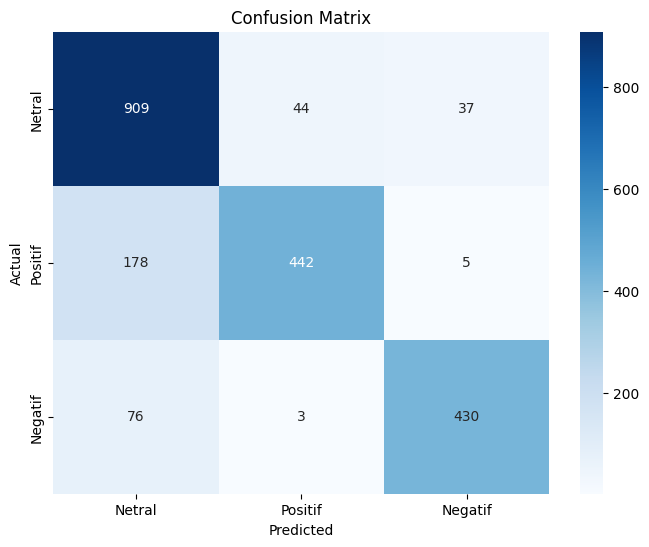

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Menghitung metrik evaluasi
accuracy = accuracy_score(dataeval['sentiment'], dataeval['predicted_sentiment'])
precision = precision_score(dataeval['sentiment'], dataeval['predicted_sentiment'], average='weighted')
recall = recall_score(dataeval['sentiment'], dataeval['predicted_sentiment'], average='weighted')
f1 = f1_score(dataeval['sentiment'], dataeval['predicted_sentiment'], average='weighted')

# Menampilkan hasil evaluasi
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))

# Menampilkan laporan klasifikasi lengkap
print("\nClassification Report:")
print(classification_report(dataeval['sentiment'], dataeval['predicted_sentiment'], target_names=['Netral', 'Positif', 'Negatif']))

# Membuat visualisasi metrik evaluasi
metrics = {
    'Accuracy': accuracy * 100,
    'Precision': precision * 100,
    'Recall': recall * 100,
    'F1 Score': f1 * 100
}

# Membuat confusion matrix
conf_matrix = confusion_matrix(dataeval['sentiment'], dataeval['predicted_sentiment'])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Netral', 'Positif', 'Negatif'], yticklabels=['Netral', 'Positif', 'Negatif'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


#Mencari insight berdasarkan hasil prediksi sentimen model yang dibuat

##Mencari sentimen setiap merek mobil

In [7]:
import pandas as pd

# URL mentah dari file data di GitHub
url = 'https://raw.githubusercontent.com/rizqi-maulidi/UAS-Deep-Learning/main/data-hasil-prediksi.csv'

# Mengimpor data menggunakan pandas
dataakhir = pd.read_csv(url)

# Menampilkan beberapa baris pertama data
dataakhir.head()

created_at      entity                                              tweet  \
0     14-Mar    Daihatsu  Hallo, sobat Nedutase Lepas Sambut Kepala SMK ...   
1     14-Jun  Mitsubishi  Shin Tae-yong selaku pelatih kepala Timnas Ind...   
2     14-Jul      Suzuki  SUZUKI XL 7 Jawabannya! Tampilan eksterior Suz...   
3     15-Nov      Toyota  Baru saja mengirim foto @ TOYOTA PERINTIS GATS...   
4     16-Feb         BMW  DIJUAL BMW E30 318i Mesin M10 Plat R Pajak On ...   

  likes  retweets                                          cleansing  \
0   NaN       NaN  hallo sobat nedutase lepas sambut kepala smk n...   
1   NaN       NaN  shin taeyong latih kepala timnas indonesia dam...   
2   NaN       NaN  suzuki xl jawab tampil eksterior suzuki xl tam...   
3   NaN       NaN  kirim foto toyota rintis gatsu medantranslate ...   
4   NaN       NaN  jual bmw mesin plat pajak on bodi mulus selesa...   

   sentiment predicted_sentiment  
0          0              Netral  
1          0              Netral  
2          1             Positif  
3          0              Netral  
4          0              Netral

In [8]:
sentiment_mapping = {'Netral': 0, 'Positif': 1, 'Negatif': 2}
dataakhir['predicted_sentiment'] = dataakhir['predicted_sentiment'].map(sentiment_mapping)
dataakhir.head()

created_at      entity                                              tweet  \
0     14-Mar    Daihatsu  Hallo, sobat Nedutase Lepas Sambut Kepala SMK ...   
1     14-Jun  Mitsubishi  Shin Tae-yong selaku pelatih kepala Timnas Ind...   
2     14-Jul      Suzuki  SUZUKI XL 7 Jawabannya! Tampilan eksterior Suz...   
3     15-Nov      Toyota  Baru saja mengirim foto @ TOYOTA PERINTIS GATS...   
4     16-Feb         BMW  DIJUAL BMW E30 318i Mesin M10 Plat R Pajak On ...   

  likes  retweets                                          cleansing  \
0   NaN       NaN  hallo sobat nedutase lepas sambut kepala smk n...   
1   NaN       NaN  shin taeyong latih kepala timnas indonesia dam...   
2   NaN       NaN  suzuki xl jawab tampil eksterior suzuki xl tam...   
3   NaN       NaN  kirim foto toyota rintis gatsu medantranslate ...   
4   NaN       NaN  jual bmw mesin plat pajak on bodi mulus selesa...   

   sentiment  predicted_sentiment  
0          0                    0  
1          0                    0  
2          1                    1  
3          0                    0  
4          0                    0

In [9]:
# Menghitung jumlah data berdasarkan kolom 'entitiy'
entity_counts = dataakhir['entity'].value_counts()

# Menampilkan hasil
print(entity_counts)

entity
Daihatsu      463
Toyota        457
Suzuki        324
Honda         287
Mitsubishi    232
Wuling        190
Hyundai       145
BMW            11
AUDI            9
Mazda           5
Mercedez        1
Name: count, dtype: int64


Berdasarkan hasil diatas akan digunakan entity Daihatsu,Toyota,Suzuki,Honda,Mitsubishi,Wuling, dan Hyundai   

In [10]:
# Daftar entitas yang diinginkan
entities = ['Daihatsu', 'Toyota', 'Suzuki', 'Honda', 'Mitsubishi', 'Wuling', 'Hyundai']

# Filter data berdasarkan entitas yang diinginkan
filtered_data = dataakhir[dataakhir['entity'].isin(entities)]

# Menghitung banyaknya sentimen berdasarkan entitas
sentiment_counts = filtered_data.groupby('entity')['predicted_sentiment'].value_counts().unstack().fillna(0)

# Menampilkan hasil
print(sentiment_counts)

predicted_sentiment    0    1    2
entity                            
Daihatsu             282  122   59
Honda                144   41  102
Hyundai               82   54    9
Mitsubishi           108   19  105
Suzuki               214   70   40
Toyota               219   98  140
Wuling                99   82    9


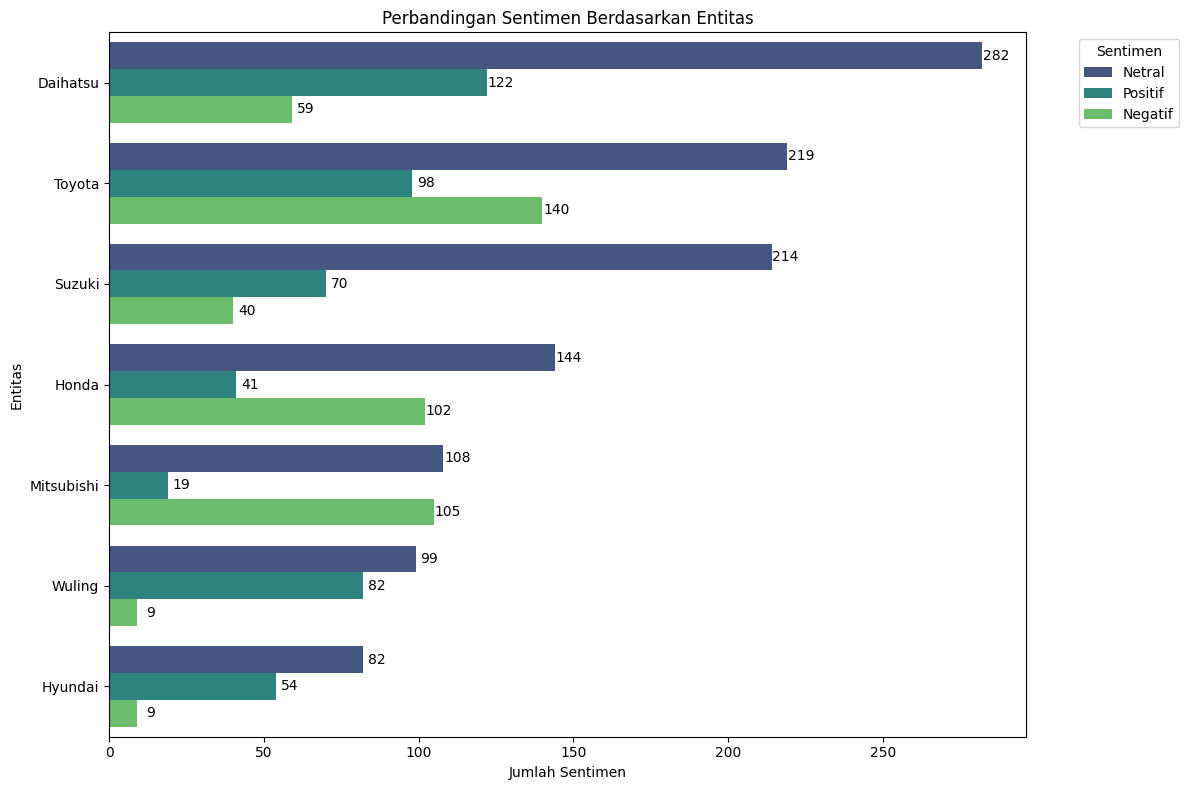

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Daftar entitas yang diinginkan
entities = ['Daihatsu', 'Toyota', 'Suzuki', 'Honda', 'Mitsubishi', 'Wuling', 'Hyundai']

# Filter data berdasarkan entitas yang diinginkan
filtered_data = dataakhir[dataakhir['entity'].isin(entities)]

# Menghitung banyaknya sentimen berdasarkan entitas
sentiment_counts = filtered_data.groupby('entity')['predicted_sentiment'].value_counts().unstack().fillna(0)

# Menambahkan label kolom
sentiment_counts.columns = ['Netral', 'Positif', 'Negatif']

# Mengurutkan entitas berdasarkan urutan dalam daftar entities
sentiment_counts = sentiment_counts.reindex(entities)

# Membuat dataframe yang di-unstack untuk visualisasi
sentiment_counts_reset = sentiment_counts.reset_index().melt(id_vars='entity', value_vars=['Netral', 'Positif', 'Negatif'], var_name='Sentiment', value_name='Count')

# Membuat visualisasi
plt.figure(figsize=(12, 8))
barplot = sns.barplot(data=sentiment_counts_reset, x='Count', y='entity', hue='Sentiment', palette='viridis')

# Menambahkan anotasi jumlah sentimen pada setiap bar, kecuali jika nilainya 0
for p in barplot.patches:
    if p.get_width() > 0:
        barplot.annotate(format(p.get_width(), '.0f'),
                         (p.get_width(), p.get_y() + p.get_height() / 2),
                         ha='center', va='center',
                         xytext=(10, 0),
                         textcoords='offset points')

# Menambahkan judul dan label
plt.title('Perbandingan Sentimen Berdasarkan Entitas')
plt.xlabel('Jumlah Sentimen')
plt.ylabel('Entitas')
plt.legend(title='Sentimen', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Menampilkan plot
plt.show()


Kesimpulan
*   Daihatsu memiliki jumlah tweet positif terbanyak (122 tweet).
*   Toyota memiliki jumlah tweet negatif terbanyak (140 tweet).

Berdasarkan hasil ini daihatsu merupakan merek dengan kepuasan masyarakat yang tinggi.

Toyota dengan kepuasan masyarakat yang rendah. Sehingga perlu menjadi merek dengan perlu melakukan evaluasi agar jumlah sentimen negarifnya berkurang.

##Mencari Korelasi antara sentimen, likes, dan retweets

In [16]:
import pandas as pd

# URL mentah dari file data di GitHub
url = 'https://raw.githubusercontent.com/rizqi-maulidi/UAS-Deep-Learning/main/data-hasil-prediksi.csv'

# Mengimpor data menggunakan pandas
dataakhir = pd.read_csv(url)

# Menampilkan beberapa baris pertama data
dataakhir.head()

created_at      entity                                              tweet  \
0     14-Mar    Daihatsu  Hallo, sobat Nedutase Lepas Sambut Kepala SMK ...   
1     14-Jun  Mitsubishi  Shin Tae-yong selaku pelatih kepala Timnas Ind...   
2     14-Jul      Suzuki  SUZUKI XL 7 Jawabannya! Tampilan eksterior Suz...   
3     15-Nov      Toyota  Baru saja mengirim foto @ TOYOTA PERINTIS GATS...   
4     16-Feb         BMW  DIJUAL BMW E30 318i Mesin M10 Plat R Pajak On ...   

  likes  retweets                                          cleansing  \
0   NaN       NaN  hallo sobat nedutase lepas sambut kepala smk n...   
1   NaN       NaN  shin taeyong latih kepala timnas indonesia dam...   
2   NaN       NaN  suzuki xl jawab tampil eksterior suzuki xl tam...   
3   NaN       NaN  kirim foto toyota rintis gatsu medantranslate ...   
4   NaN       NaN  jual bmw mesin plat pajak on bodi mulus selesa...   

   sentiment predicted_sentiment  
0          0              Netral  
1          0              Netral  
2          1             Positif  
3          0              Netral  
4          0              Netral

In [17]:
sentiment_mapping = {'Netral': 0, 'Positif': 1, 'Negatif': 2}
dataakhir['predicted_sentiment'] = dataakhir['predicted_sentiment'].map(sentiment_mapping)
dataakhir.head()

created_at      entity                                              tweet  \
0     14-Mar    Daihatsu  Hallo, sobat Nedutase Lepas Sambut Kepala SMK ...   
1     14-Jun  Mitsubishi  Shin Tae-yong selaku pelatih kepala Timnas Ind...   
2     14-Jul      Suzuki  SUZUKI XL 7 Jawabannya! Tampilan eksterior Suz...   
3     15-Nov      Toyota  Baru saja mengirim foto @ TOYOTA PERINTIS GATS...   
4     16-Feb         BMW  DIJUAL BMW E30 318i Mesin M10 Plat R Pajak On ...   

  likes  retweets                                          cleansing  \
0   NaN       NaN  hallo sobat nedutase lepas sambut kepala smk n...   
1   NaN       NaN  shin taeyong latih kepala timnas indonesia dam...   
2   NaN       NaN  suzuki xl jawab tampil eksterior suzuki xl tam...   
3   NaN       NaN  kirim foto toyota rintis gatsu medantranslate ...   
4   NaN       NaN  jual bmw mesin plat pajak on bodi mulus selesa...   

   sentiment  predicted_sentiment  
0          0                    0  
1          0                    0  
2          1                    1  
3          0                    0  
4          0                    0

Distribusi Sentimen:
 predicted_sentiment
0    867
1    371
2    364
Name: count, dtype: int64

Rata-rata Likes Berdasarkan Sentimen:
 predicted_sentiment
0    1.206689e+06
1    1.414145e+06
2    1.337845e+06
Name: likes, dtype: float64

Rata-rata Retweets Berdasarkan Sentimen:
 predicted_sentiment
0    2223.430219
1    1887.822102
2    2392.557692
Name: retweets, dtype: float64

Korelasi antara Likes, Retweets, dan Sentimen:
                      predicted_sentiment     likes  retweets
predicted_sentiment             1.000000  0.018804  0.006354
likes                           0.018804  1.000000 -0.128535
retweets                        0.006354 -0.128535  1.000000


<ipython-input-14-5b40d83b996b>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='predicted_sentiment', y='likes', data=dataakhir, palette='viridis')
<ipython-input-14-5b40d83b996b>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='predicted_sentiment', y='retweets', data=dataakhir, palette='viridis')


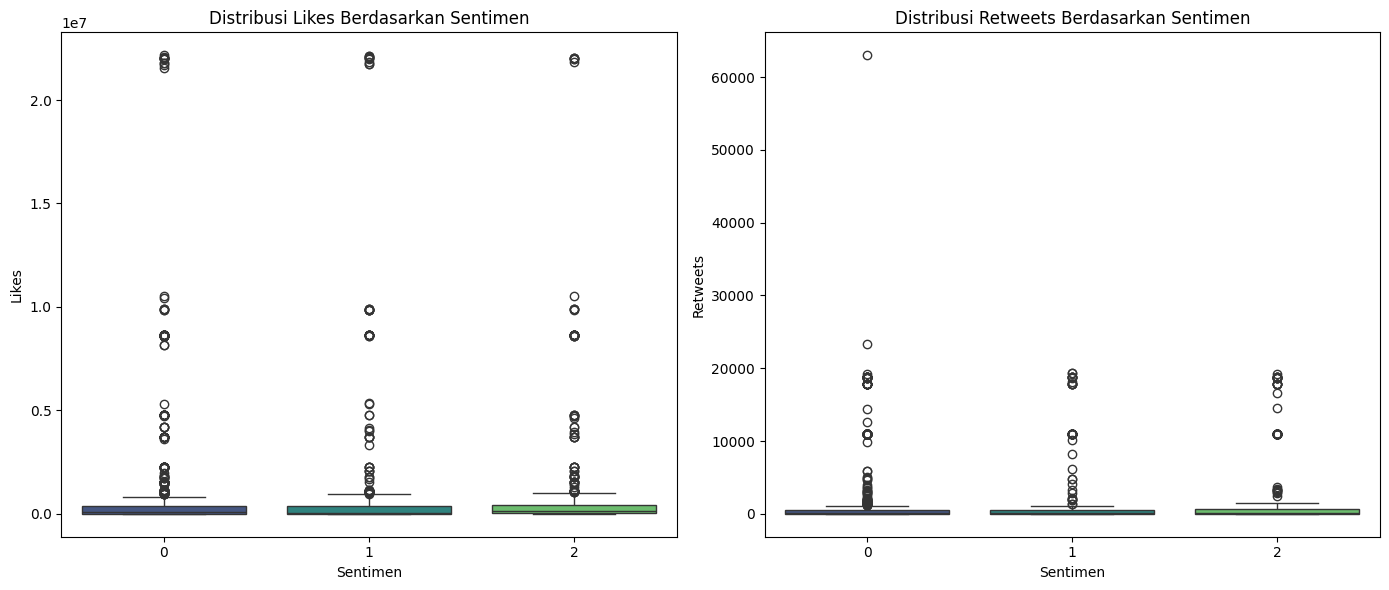

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Memastikan kolom likes dan retweets dalam format numerik, mengabaikan nilai yang tidak bisa dikonversi
dataakhir['likes'] = pd.to_numeric(dataakhir['likes'], errors='coerce')
dataakhir['retweets'] = pd.to_numeric(dataakhir['retweets'], errors='coerce')

# Menghapus baris dengan nilai likes atau retweets yang tidak valid (NaN)
dataakhir = dataakhir.dropna(subset=['likes', 'retweets'])

# Distribusi Sentimen
sentiment_distribution = dataakhir['predicted_sentiment'].value_counts()
print("Distribusi Sentimen:\n", sentiment_distribution)

# Rata-rata Likes dan Retweets Berdasarkan Sentimen
average_likes = dataakhir.groupby('predicted_sentiment')['likes'].mean()
average_retweets = dataakhir.groupby('predicted_sentiment')['retweets'].mean()
print("\nRata-rata Likes Berdasarkan Sentimen:\n", average_likes)
print("\nRata-rata Retweets Berdasarkan Sentimen:\n", average_retweets)

# Korelasi antara Likes, Retweets, dan Sentimen
correlation = dataakhir[['predicted_sentiment', 'likes', 'retweets']].corr()
print("\nKorelasi antara Likes, Retweets, dan Sentimen:\n", correlation)

# Visualisasi Distribusi Likes dan Retweets untuk Setiap Sentimen
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='predicted_sentiment', y='likes', data=dataakhir, palette='viridis')
plt.title('Distribusi Likes Berdasarkan Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Likes')

plt.subplot(1, 2, 2)
sns.boxplot(x='predicted_sentiment', y='retweets', data=dataakhir, palette='viridis')
plt.title('Distribusi Retweets Berdasarkan Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Retweets')

plt.tight_layout()
plt.show()


Kesimpulan

Sentimen Netral (0)
Sentimen Positif (1)
Sentimen Negatif (2)

*   Tweet positif cenderung mendapatkan rata-rata likes tertinggi, diikuti oleh tweet negatif, dan kemudian tweet netral.
*   Tweet negatif cenderung mendapatkan rata-rata retweets tertinggi, diikuti oleh tweet netral, dan kemudian tweet positif.
*   Dalam hal ini, korelasi antara sentimen dan jumlah likes/retweets sangat lemah, menunjukkan bahwa sentimen tidak berpengaruh signifikan terhadap jumlah likes dan retweets. Korelasi antara likes dan retweets juga sangat lemah dan negatif.

##Mencari kata yang diperbincangkan dengan Wordcloud

In [18]:
import pandas as pd

# URL mentah dari file data di GitHub
url = 'https://raw.githubusercontent.com/rizqi-maulidi/UAS-Deep-Learning/main/data-hasil-prediksi.csv'

# Mengimpor data menggunakan pandas
dataakhir = pd.read_csv(url)

# Menampilkan beberapa baris pertama data
dataakhir.head()

created_at      entity                                              tweet  \
0     14-Mar    Daihatsu  Hallo, sobat Nedutase Lepas Sambut Kepala SMK ...   
1     14-Jun  Mitsubishi  Shin Tae-yong selaku pelatih kepala Timnas Ind...   
2     14-Jul      Suzuki  SUZUKI XL 7 Jawabannya! Tampilan eksterior Suz...   
3     15-Nov      Toyota  Baru saja mengirim foto @ TOYOTA PERINTIS GATS...   
4     16-Feb         BMW  DIJUAL BMW E30 318i Mesin M10 Plat R Pajak On ...   

  likes  retweets                                          cleansing  \
0   NaN       NaN  hallo sobat nedutase lepas sambut kepala smk n...   
1   NaN       NaN  shin taeyong latih kepala timnas indonesia dam...   
2   NaN       NaN  suzuki xl jawab tampil eksterior suzuki xl tam...   
3   NaN       NaN  kirim foto toyota rintis gatsu medantranslate ...   
4   NaN       NaN  jual bmw mesin plat pajak on bodi mulus selesa...   

   sentiment predicted_sentiment  
0          0              Netral  
1          0              Netral  
2          1             Positif  
3          0              Netral  
4          0              Netral

In [19]:
sentiment_mapping = {'Netral': 0, 'Positif': 1, 'Negatif': 2}
dataakhir['predicted_sentiment'] = dataakhir['predicted_sentiment'].map(sentiment_mapping)
dataakhir.head()

created_at      entity                                              tweet  \
0     14-Mar    Daihatsu  Hallo, sobat Nedutase Lepas Sambut Kepala SMK ...   
1     14-Jun  Mitsubishi  Shin Tae-yong selaku pelatih kepala Timnas Ind...   
2     14-Jul      Suzuki  SUZUKI XL 7 Jawabannya! Tampilan eksterior Suz...   
3     15-Nov      Toyota  Baru saja mengirim foto @ TOYOTA PERINTIS GATS...   
4     16-Feb         BMW  DIJUAL BMW E30 318i Mesin M10 Plat R Pajak On ...   

  likes  retweets                                          cleansing  \
0   NaN       NaN  hallo sobat nedutase lepas sambut kepala smk n...   
1   NaN       NaN  shin taeyong latih kepala timnas indonesia dam...   
2   NaN       NaN  suzuki xl jawab tampil eksterior suzuki xl tam...   
3   NaN       NaN  kirim foto toyota rintis gatsu medantranslate ...   
4   NaN       NaN  jual bmw mesin plat pajak on bodi mulus selesa...   

   sentiment  predicted_sentiment  
0          0                    0  
1          0                    0  
2          1                    1  
3          0                    0  
4          0                    0

In [20]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Pastikan untuk mengunduh tokenizer punkt dari nltk jika belum
nltk.download('punkt')

# Fungsi untuk menghitung n-grams
def count_ngrams(texts, n):
    ngram_counts = Counter()
    for text in texts:
        tokens = word_tokenize(text)
        ngrams_generated = ngrams(tokens, n)
        ngram_counts.update(ngrams_generated)
    return ngram_counts

# Fungsi untuk membuat word cloud dari n-grams
def create_wordcloud_from_ngrams(ngram_counts, title):
    # Menggabungkan n-grams menjadi satu string
    ngram_freqs = {" ".join(ngram): count for ngram, count in ngram_counts.items()}
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(ngram_freqs)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [21]:
import pandas as pd

# Daftar entitas yang ingin dipisahkan
brands = ['Daihatsu', 'Toyota', 'Suzuki', 'Honda', 'Mitsubishi', 'Wuling', 'Hyundai']

# Memisahkan data berdasarkan entitas
data_by_brand = {brand: dataakhir[dataakhir['entity'].str.contains(brand, case=False, na=False)] for brand in brands}

# Menampilkan beberapa baris pertama dari setiap entitas untuk memverifikasi pemisahan
for brand, data in data_by_brand.items():
    print(f"\nData for {brand}:")
    print(data.head())



Data for Daihatsu:
   created_at    entity                                              tweet  \
0      14-Mar  Daihatsu  Hallo, sobat Nedutase Lepas Sambut Kepala SMK ...   
12     19-Apr  Daihatsu  QS. Maryam ayat 4: Dan aku belum pernah kecewa...   
37     22-Oct  Daihatsu  Baru saja mengirim foto @ Daihatsu Rangkasbitu...   
40     22-Nov  Daihatsu  Inilah dia skuad Indonesia di Daihatsu Indones...   
41     23-Jan  Daihatsu  nonton bulutangkis indonesia daihatsu indonesi...   

      likes  retweets                                          cleansing  \
0       NaN       NaN  hallo sobat nedutase lepas sambut kepala smk n...   
12      NaN       NaN             qs maryam ayat kecewa doa kepada tuhan   
37      NaN       NaN  kirim foto daihatsu rangkasbitung lebak banten...   
40      NaN       NaN  skuad indonesia daihatsu indonesia masters ayo...   
41  1837302     159.0  nonton bulutangkis indonesia daihatsu indonesi...   

    sentiment  predicted_sentiment  
0           0    

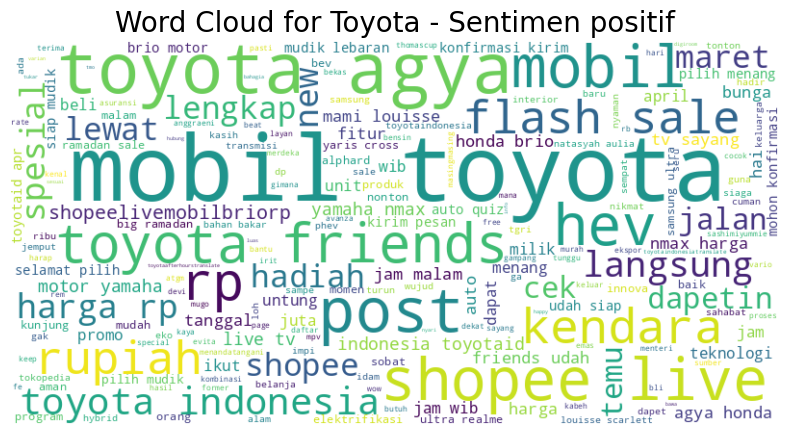

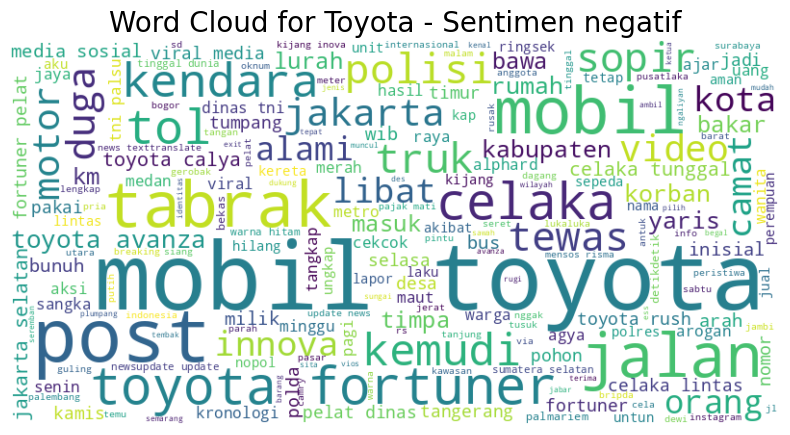

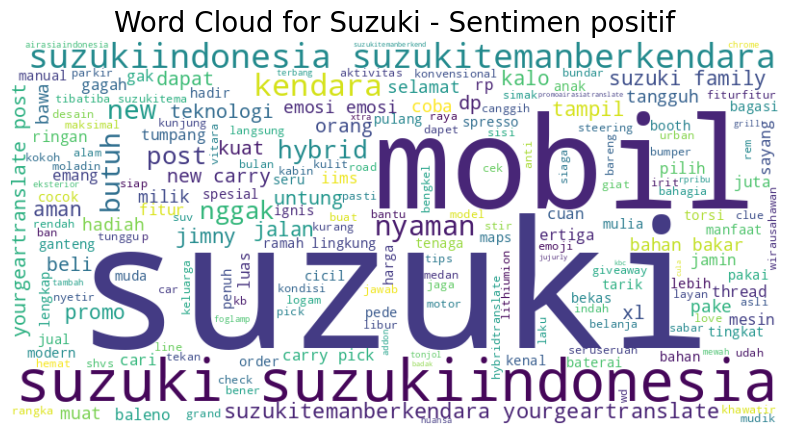

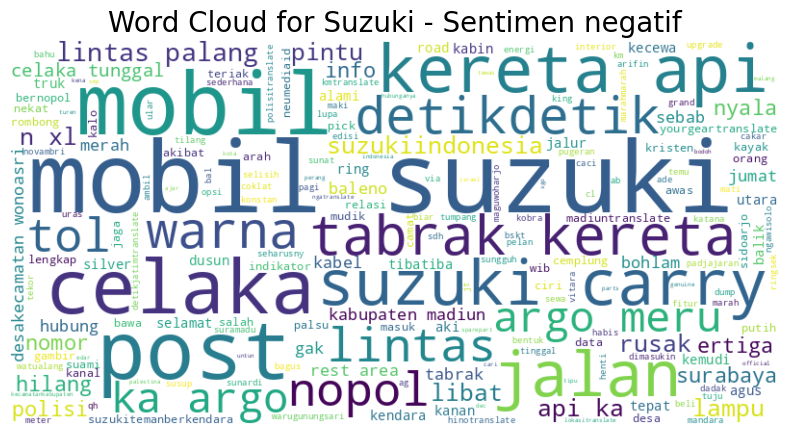

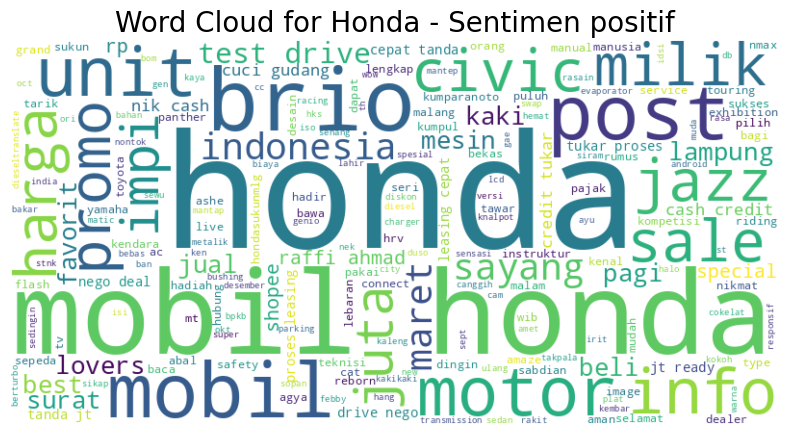

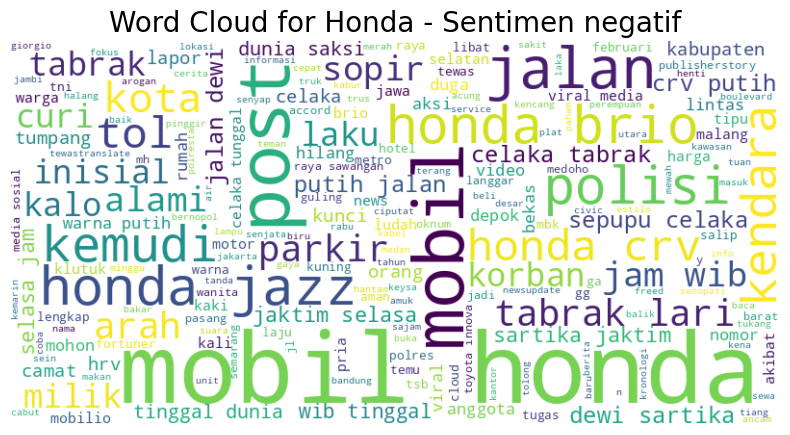

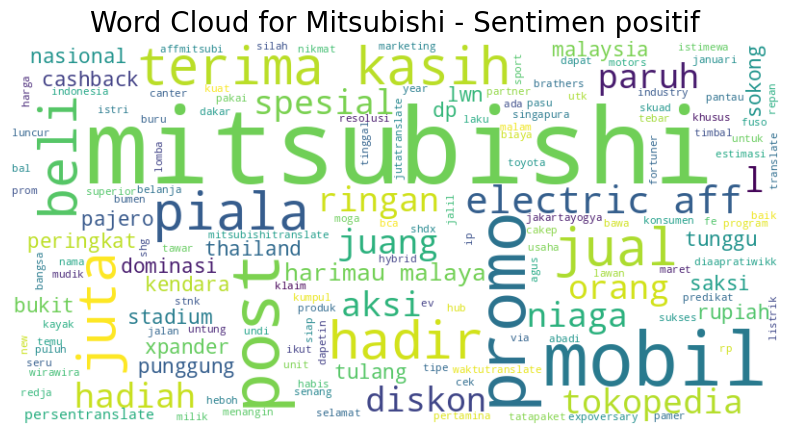

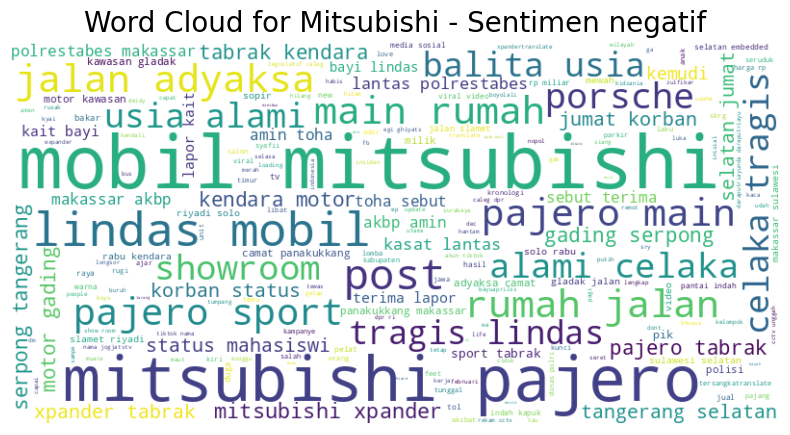

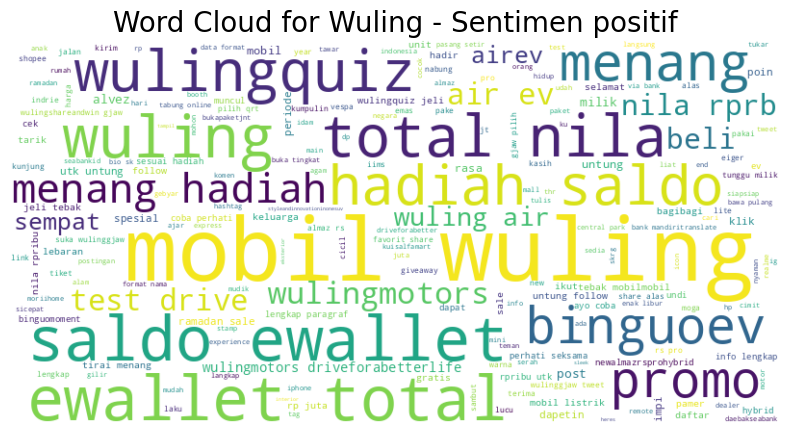

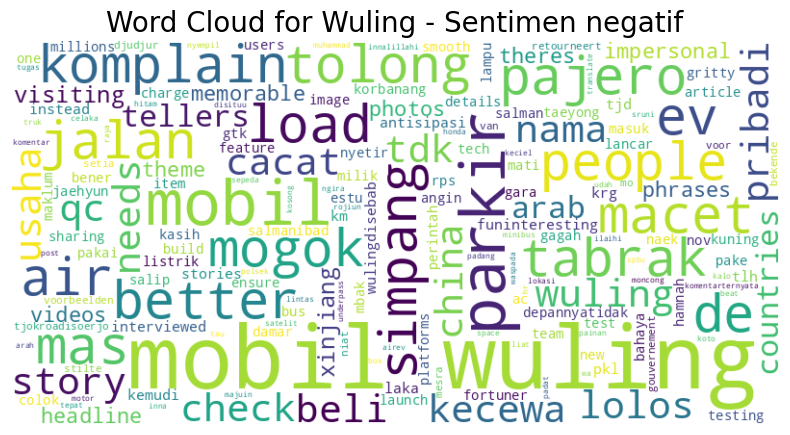

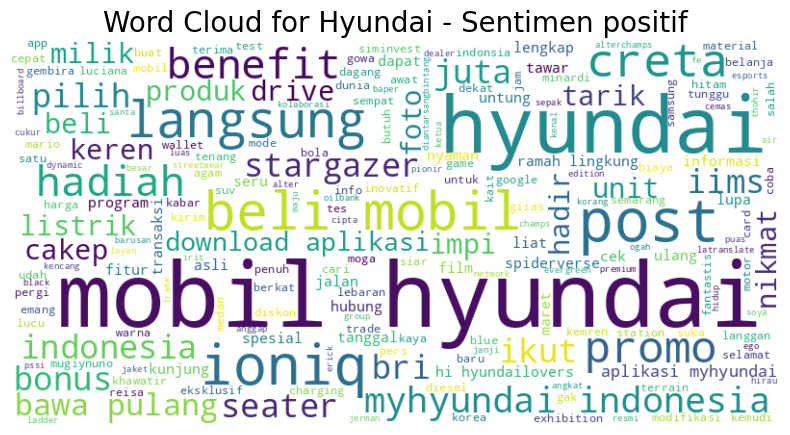

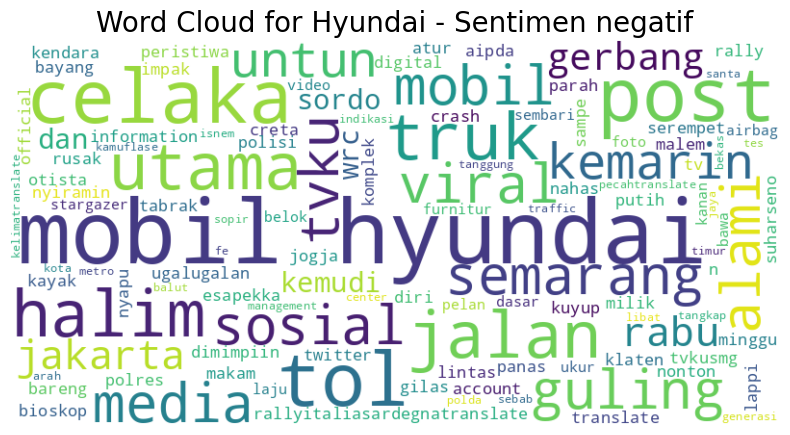

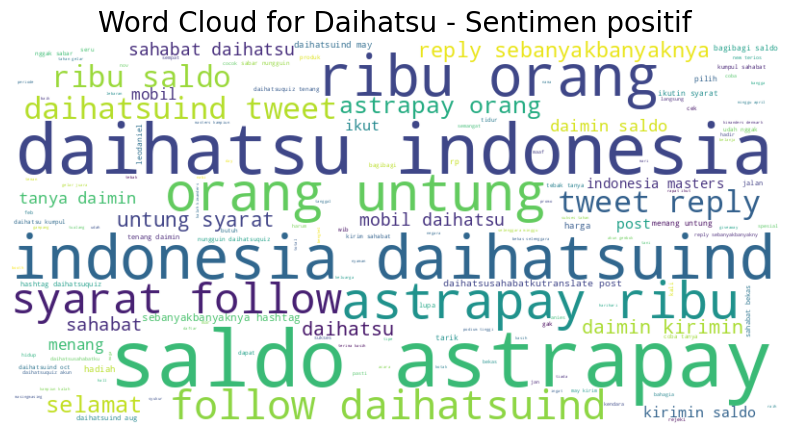

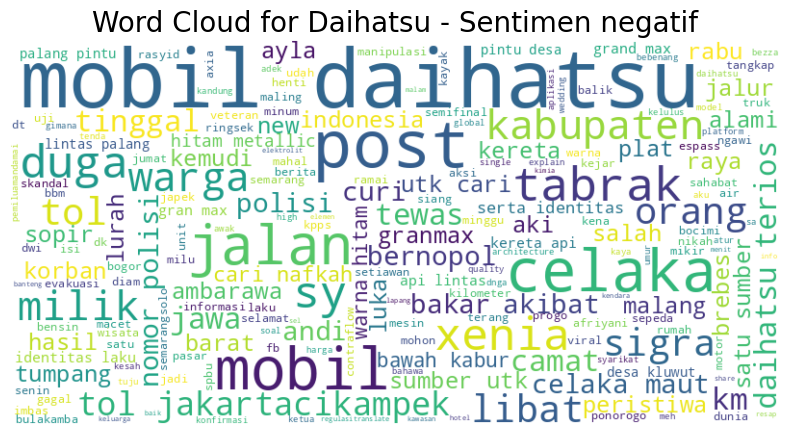

In [23]:
# Daftar entitas yang ingin dipisahkan
brands = ['Toyota', 'Suzuki', 'Honda', 'Mitsubishi', 'Wuling', 'Hyundai', 'Daihatsu']

# Memisahkan data berdasarkan entitas
data_by_brand = {brand: dataakhir[dataakhir['entity'].str.contains(brand, case=False, na=False)] for brand in brands}

# Fungsi untuk membuat word cloud
def create_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, size=20)
    plt.axis('off')
    plt.show()

# Membuat word cloud untuk setiap entitas dan sentimen positif (1) serta negatif (2)
for brand in brands:
    for sentiment in [1, 2]:  # 1: positif, 2: negatif
        filtered_data = data_by_brand[brand][data_by_brand[brand]['predicted_sentiment'] == sentiment]
        text = " ".join(review for review in filtered_data['cleansing'])
        sentiment_label = 'positif' if sentiment == 1 else 'negatif'
        title = f'Word Cloud for {brand} - Sentimen {sentiment_label}'
        create_word_cloud(text, title)

Berdasarkan word cloud diatas diketahui bahwa kata tabrak dan celakan mendominasi sentimen negatif pada setiap merek mobil yang mungkin berkaitan dengan skandal uji keselamatan sehinggan perlu dilakukan evaluasi untuk meningkatkan keselamatan pengguna.

Sedangkan dalam sentimen positif banyak kata promo,saldo,diskon di setiap merek yang menunjukan keberhasilan setiap merek dalam promosi yang perlu dipertahankan.